Written by Doug Issichopoulos, [dougissi.com](https://dougissi.com)

Feb 6, 2020

# Imports

In [1]:
import pandas as pd
import networkx as nx

# Example 1

## Data

In [2]:
data = {
    'A': {'B':1, 'C':1},
    'B': {'A':1, 'C':1},
    'C': {'A':1, 'B':1, 'D':1, 'E':1},
    'D': {'C':1},
    'E': {'C':1},
}
df = pd.DataFrame(data).fillna(0)
df.sort_index(inplace=True)
df.sort_index(axis=1, inplace=True)
df

,A,B,C,D,E
A,0.0,1.0,1.0,0.0,0.0
B,1.0,0.0,1.0,0.0,0.0
C,1.0,1.0,0.0,1.0,1.0
D,0.0,0.0,1.0,0.0,0.0
E,0.0,0.0,1.0,0.0,0.0


## Plot

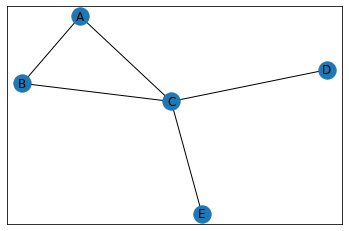

In [3]:
G = nx.Graph(df)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

## Count Triangles

In [4]:
S1 = df.values
S1

array([[0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [5]:
S2 = S1.dot(S1)
S2

array([[2., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1.],
       [1., 1., 4., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1.]])

In [6]:
S3 = S2.dot(S1)
S3

array([[2., 3., 5., 1., 1.],
       [3., 2., 5., 1., 1.],
       [5., 5., 2., 4., 4.],
       [1., 1., 4., 0., 0.],
       [1., 1., 4., 0., 0.]])

In [7]:
S3.trace() / 6

1.0

# Example 2

## Data

In [8]:
data = {
    'A': {'B':1, 'C':1, 'D': 1},
    'B': {'A':1, 'C':1},
    'C': {'A':1, 'B':1, 'D':1, 'E':1},
    'D': {'A': 1, 'C':1, 'E':1},
    'E': {'C':1, 'D': 1},
}
df = pd.DataFrame(data).fillna(0)
df.sort_index(inplace=True)
df.sort_index(axis=1, inplace=True)
df

,A,B,C,D,E
A,0.0,1.0,1.0,1.0,0.0
B,1.0,0.0,1.0,0.0,0.0
C,1.0,1.0,0.0,1.0,1.0
D,1.0,0.0,1.0,0.0,1.0
E,0.0,0.0,1.0,1.0,0.0


## Plot

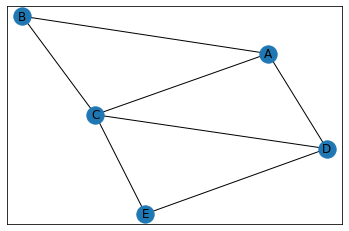

In [9]:
G = nx.Graph(df)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

## Count Triangles

In [10]:
S1 = df.values
S1

array([[0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [11]:
S2 = S1.dot(S1)
S2

array([[3., 1., 2., 1., 2.],
       [1., 2., 1., 2., 1.],
       [2., 1., 4., 2., 1.],
       [1., 2., 2., 3., 1.],
       [2., 1., 1., 1., 2.]])

In [12]:
S3 = S2.dot(S1)
S3

array([[4., 5., 7., 7., 3.],
       [5., 2., 6., 3., 3.],
       [7., 6., 6., 7., 6.],
       [7., 3., 7., 4., 5.],
       [3., 3., 6., 5., 2.]])

In [13]:
S3.trace() / 6

3.0